<h1>Analysis code of computer simulations<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Computer-SImulation" data-toc-modified-id="Computer-SImulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Computer SImulation</a></span></li><li><span><a href="#Data-from-Nakawake-&amp;-Kobayashi-(2022):-'Negative-observational-learning-might-play-a-limited-role-in-the-cultural-evolution-of-technology'" data-toc-modified-id="Data-from-Nakawake-&amp;-Kobayashi-(2022):-'Negative-observational-learning-might-play-a-limited-role-in-the-cultural-evolution-of-technology'-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data from Nakawake &amp; Kobayashi (2022): 'Negative observational learning might play a limited role in the cultural evolution of technology'</a></span><ul class="toc-item"><li><span><a href="#Simulation-Data" data-toc-modified-id="Simulation-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simulation Data</a></span><ul class="toc-item"><li><span><a href="#Prepartion" data-toc-modified-id="Prepartion-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prepartion</a></span></li><li><span><a href="#Visualizing-Learning-Curve:--$g(\tau)$" data-toc-modified-id="Visualizing-Learning-Curve:--$g(\tau)$-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Visualizing Learning Curve:  $g(\tau)$</a></span></li></ul></li><li><span><a href="#Total-Payoff:-$W$" data-toc-modified-id="Total-Payoff:-$W$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Total Payoff: $W$</a></span><ul class="toc-item"><li><span><a href="#Season-1" data-toc-modified-id="Season-1-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Season 1</a></span></li><li><span><a href="#Season2" data-toc-modified-id="Season2-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Season2</a></span></li><li><span><a href="#Season3" data-toc-modified-id="Season3-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Season3</a></span></li></ul></li><li><span><a href="#Experimental-Data" data-toc-modified-id="Experimental-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Experimental Data</a></span><ul class="toc-item"><li><span><a href="#Learning-Curve" data-toc-modified-id="Learning-Curve-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Learning Curve</a></span></li><li><span><a href="#Season1" data-toc-modified-id="Season1-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Season1</a></span></li><li><span><a href="#Season2" data-toc-modified-id="Season2-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Season2</a></span></li></ul></li><li><span><a href="#Season3" data-toc-modified-id="Season3-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Season3</a></span><ul class="toc-item"><li><span><a href="#All-Seasons" data-toc-modified-id="All-Seasons-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>All Seasons</a></span></li></ul></li></ul></li></ul></div>

# Computer SImulation 

In [1]:
datad<-read.csv("simulation_exp.csv")

In [2]:
library("reshape")
library("dplyr")
library("tidyverse")
library("magrittr")
library("ggplot2")
library("gridExtra")

library(viridis)
library(scales)
library(rcartocolor)


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks reshape::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::rename() masks reshape::rename()

Warning message:
“package ‘magrittr’ was built under R version 4.0.5”

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’




In [3]:
#Arial Us#library("extrafont")
#options(warn = -1)
#quartzFonts(ARIAL = c("Arial", "Arial-Bold", "Arial", "Arial") ) 
#plot(1:10 ~ c(1:10), font=2, pch="A", family="ARIAL", xlab="Arial")


[1] "#117733" "#CF6677"

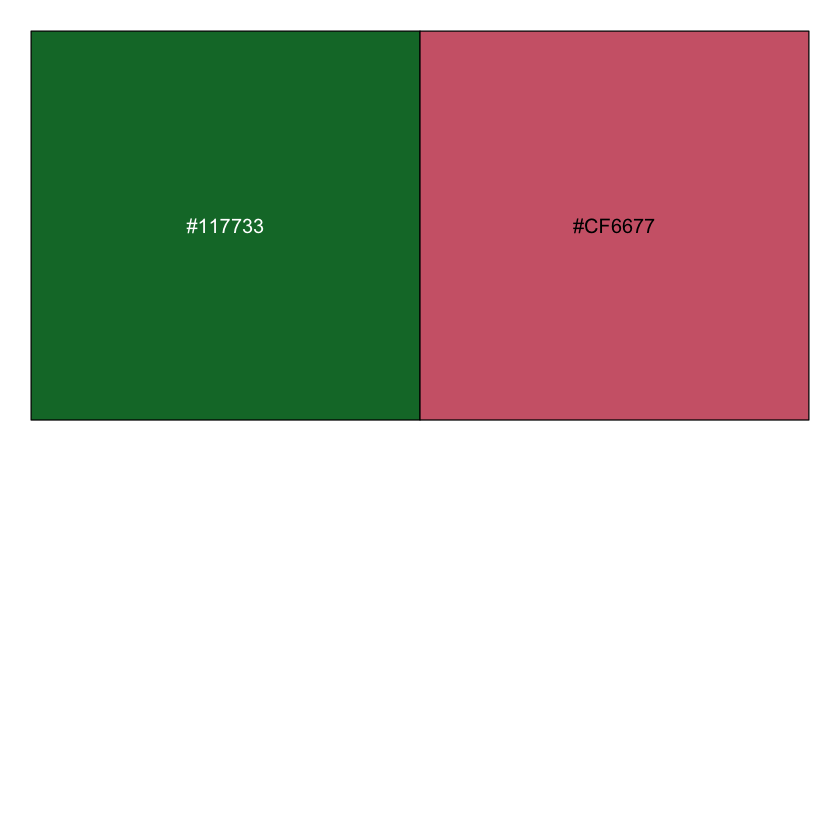

In [4]:


CPalet<-c("#117733","#CF6677")
#CPalet<-c("#117733","#6699CC","#CF6677")
show_col(CPalet)

CPalet

In [5]:
mdf<-melt(datad, id.vars= "tau")

mdf$variable <-factor(mdf$variable, levels=c("Nonrepaid","Repaid"))

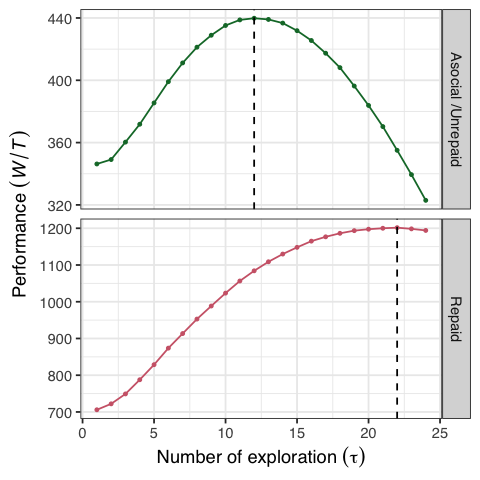

In [6]:
labeli <- as_labeller(c("Nonrepaid" = "Asocial /Unrepaid",
                         "Repaid" = "Repaid" ))
taulabel<- expression(italic(tau)*"*")

y_title <- expression("Performance " (italic(W)/italic(T)))
x_title <- expression("Number of exploration "*(italic(tau)))

options(repr.plot.width=4., repr.plot.height=4)
mdf %>%  ggplot(aes(x=tau,y=as.numeric(value)))+
geom_line(aes( color = as.factor(variable)), alpha = 1)+
geom_point(aes(color = as.factor(variable)),size = 0.7, alpha = 1)+
facet_grid(variable~ . , scales = "free", labeller = labeli) +geom_vline(xintercept = 12, size = 0.5, linetype = 2, alpha=c(1,0)) +
geom_vline(xintercept = 22, size = 0.5, linetype = 2, alpha=c(0,1)) +
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none",text=element_text(family="Helvetica"))+
xlab(x_title)+ylab(y_title )
ggsave("Simuation_main.pdf", dpi = 220, device = "pdf", width = 4, height = 4)
ggsave("Simuation_main.eps", dpi = 220, device = "eps", width = 4, height = 4)
           

# Data from Nakawake & Kobayashi (2022): 'Negative observational learning might play a limited role in the cultural evolution of technology'

The link of the paper: https://doi.org/10.1038/s41598-022-05031-2

## Simulation Data

Data and code at github:  https://github.com/YNakawake/projectile_neg/blob/main/analysis/simulation_visulization/SImulation3.3_visualization.ipynb

### Prepartion

In [7]:
df<-read.csv("Simulation3.3.csv")

In [8]:
head(mdf)

,tau,variable,value
,<int>,<fct>,<dbl>
1,1,Repaid,705.954
2,2,Repaid,722.114
3,3,Repaid,749.112
4,4,Repaid,787.678
5,5,Repaid,828.654
6,6,Repaid,873.728


In [9]:
mdf <-melt(df, id.vars = c('Season','Strategy','Condition','Item'))
colnames(mdf)[6]<-"Fitness"

head(mdf)

,Season,Strategy,Condition,Item,variable,Fitness
,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,1,Directional,Asocial,M,X1,317
2,1,Directional,Asocial,SE,X1,0
3,1,Move,Asocial,M,X1,317
4,1,Move,Asocial,SE,X1,0
5,1,Mirror,Asocial,M,X1,317
6,1,Mirror,Asocial,SE,X1,0


In [10]:
# setting Trial
as.character(mdf[,5]) %>% str_split_fixed(., pattern="X",2) -> TrialMat
as.numeric(TrialMat[,2]) -> Trial

cbind(mdf, Trial) -> mdf

### Visualizing Learning Curve:  $g(\tau)$

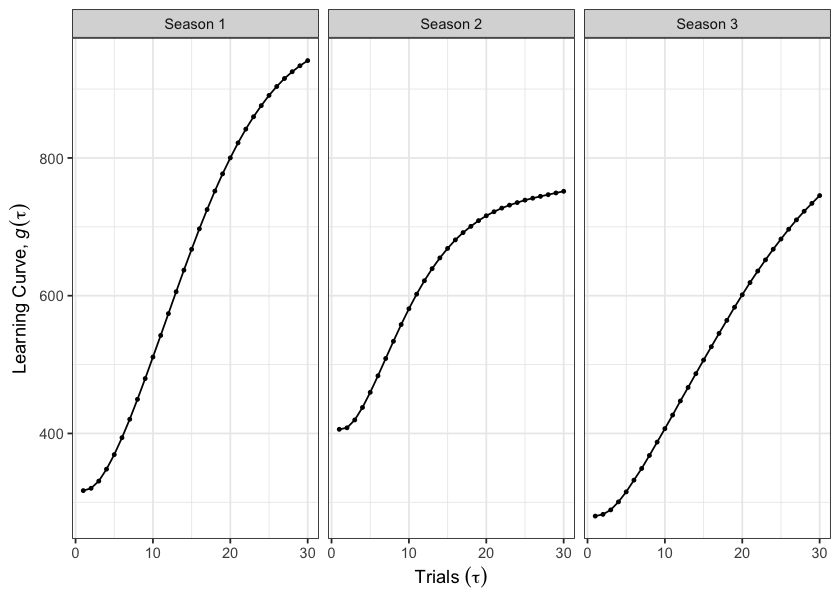

In [11]:
labeli <- as_labeller(c("1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3",
                          "Directional"="Memory Only",
                          "Move"="Fixed Stride",
                          "Mirror"="Variable Stride"))

options(repr.plot.width=7, repr.plot.height=5)

y_title <- expression("Learning Curve, "*italic(g(tau)))
x_title <- expression("Trials "*(italic(tau)))

ggplot(mdf[(mdf$Item=="M")&(mdf$Strategy=="Mirror")&(mdf$Condition=="Asocial"),], aes(x=Trial, y=Fitness, group= Condition, fill  = Condition, color = Condition,  shape = Condition)) +  
geom_point(size = 0.7)+geom_line()+
scale_color_manual(values = "black")+
scale_fill_manual(values = "black")+
theme_bw()+scale_shape_manual(values = c(21))+theme(legend.position = "none")+ylab(y_title ) +xlab(x_title )+
facet_grid(.~ Season  ,labeller = labeli) -> SimuPlot
 SimuPlot

## Total Payoff: $W$

- Calculating with the following formula (see Formula  (11) and (12) in the manuscript)

\begin{equation}
  \label{eq:simW}
  W_{p,u} = \sum_{\tau=0}^{\tau_p-1} g(\tau)+(T-2\tau_p)g(\tau_p),
\end{equation}


\begin{equation}
  \label{eq:simW_repaid}
  W_{p,r} = \sum_{\tau=0}^{\tau_p-1} g(\tau)+(2T-2\tau_p)g(\tau_p).
\end{equation}

which can also be written as follows: 

\begin{equation}
  W_{p,u} = g(0) +\sum_{\tau_p=1}^\tau g(t)+(T-2\tau -1)g(\tau)
\end{equation}


\begin{equation}
 W_{p,r} = g(0) +\sum_{\tau_p=1}^\tau g(t)+(2T-2\tau -1)g(\tau)
\end{equation}

This  form is especially helpful given an iterator of R does not allow $i$ = 0

In [12]:
saveSimOpt_tp<-data.frame(matrix(0,2,3))
rownames(saveSimOpt_tp)<-c("Wpu","Wpr")
colnames(saveSimOpt_tp)<-c("Season1","Season2", "Season3")

saveSimOpt_tp

,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,0,0,0
Wpr,0,0,0


### Season 1

In [13]:
T = 50
LarningCurve<- mdf[(mdf$Item=="M")&(mdf$Strategy=="Mirror")&(mdf$Condition=="Asocial")&(mdf$Season==1),]$Fitness
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]


Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


SimS1W<-melt(cbind(Wpu, Wpr)) 
colnames(SimS1W)<-c("tau", "Condition","Performance")
SimS1W$Condition <- factor(SimS1W$Condition, levels = c("Wpu","Wpr"))

head(SimS1W)



[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,15694.95
2,2,Wpu,15854.04
3,3,Wpu,16286.82
4,4,Wpu,16824.78
5,5,Wpu,17439.65
6,6,Wpu,18061.54


In [14]:
saveSimOpt_tp[1,1] <-WpuMax
saveSimOpt_tp[2,1] <-WprMax
#saveSimOpt_tp


    a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(1, 25))
    b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(1, 25))
rbind(a,b) -> SaveS1S

[1] 14

[1] 23

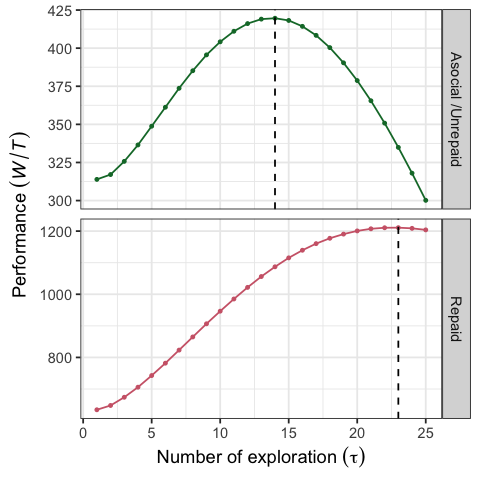

In [15]:
labeli2 <- as_labeller(c("Wpu" = "Asocial /Unrepaid",
                         "Wpr" = "Repaid" ))
taulabel<- expression(italic(tau)*"*")

y_title <- expression("Performance " (italic(W)/italic(T)))
x_title <- expression("Number of exploration "*(italic(tau)))

options(repr.plot.width=4., repr.plot.height=4)
SimS1W %>%  ggplot(aes(x=tau,y=as.numeric(Performance/50)))+
geom_line(aes( color = as.factor(Condition)), alpha = 1)+
geom_point(aes(color = as.factor(Condition)),size = 0.7, alpha = 1)+
facet_grid(Condition~ . , scales = "free", labeller = labeli2) +geom_vline(xintercept = WpuMax, size = 0.5, linetype = 2, alpha=c(1,0)) +
geom_vline(xintercept = WprMax, size = 0.5, linetype = 2, alpha=c(0,1)) +
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none")+
xlab(x_title )+ylab(y_title ) -> SimS1plot
#ggsave("Simuation_main.pdf", dpi = 220, device = "pdf", width = 4, height = 4)
SimS1plot
WpuMax
WprMax

### Season2

In [16]:
T = 50
LarningCurve<- mdf[(mdf$Item=="M")&(mdf$Strategy=="Mirror")&(mdf$Condition=="Asocial")&(mdf$Season==2),]$Fitness
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]





Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


SimS2W<-melt(cbind(Wpu, Wpr)) 
colnames(SimS2W)<-c("tau", "Condition","Performance")
SimS2W$Condition <- factor(SimS2W$Condition, levels = c("Wpu","Wpr"))

head(SimS2W)

[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,19998.69
2,2,Wpu,20116.70
3,3,Wpu,20493.92
4,4,Wpu,20979.01
5,5,Wpu,21477.35
6,6,Wpu,21950.20


In [17]:
saveSimOpt_tp[1,2] <-WpuMax
saveSimOpt_tp[2,2] <-WprMax
saveSimOpt_tp


    a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(2, 25))
    b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(2, 25))
rbind(a,b) -> SaveS2S

,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,14,10,0
Wpr,23,16,0


[1] 10

[1] 16

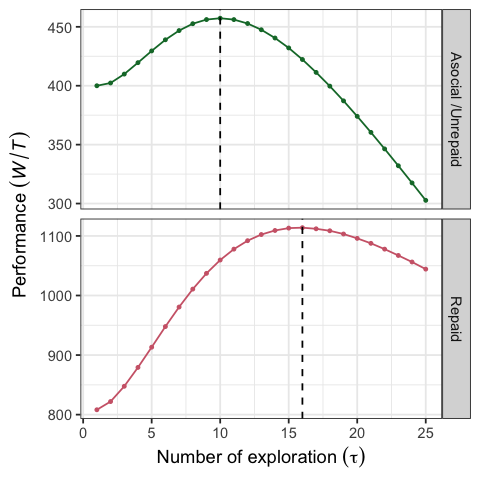

In [18]:
labeli2 <- as_labeller(c("Wpu" = "Asocial /Unrepaid",
                         "Wpr" = "Repaid" ))
taulabel<- expression(italic(tau)*"*")

y_title <- expression("Performance " (italic(W)/italic(T)))
x_title <- expression("Number of exploration "*(italic(tau)))

options(repr.plot.width=4., repr.plot.height=4)
SimS2W %>%  ggplot(aes(x=tau,y=as.numeric(Performance/50)))+
geom_line(aes( color = as.factor(Condition)), alpha = 1)+
geom_point(aes(color = as.factor(Condition)),size = 0.7, alpha = 1)+
facet_grid(Condition~ . , scales = "free", labeller = labeli2) +geom_vline(xintercept = WpuMax, size = 0.5, linetype = 2, alpha=c(1,0)) +
geom_vline(xintercept = WprMax, size = 0.5, linetype = 2, alpha=c(0,1)) +
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none")+
xlab(x_title )+ylab(y_title ) -> SimS2plot
#ggsave("Simuation_main.pdf", dpi = 220, device = "pdf", width = 4, height = 4)
SimS2plot
WpuMax
WprMax

### Season3

In [19]:
T = 50
LarningCurve<- mdf[(mdf$Item=="M")&(mdf$Strategy=="Mirror")&(mdf$Condition=="Asocial")&(mdf$Season==3),]$Fitness
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]





Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


SimS3W<-melt(cbind(Wpu, Wpr)) 
colnames(SimS3W)<-c("tau", "Condition","Performance")
SimS3W$Condition <- factor(SimS3W$Condition, levels = c("Wpu","Wpr"))

head(SimS3W)

[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,13841.49
2,2,Wpu,13858.60
3,3,Wpu,14080.97
4,4,Wpu,14389.43
5,5,Wpu,14755.18
6,6,Wpu,15067.23


In [20]:
saveSimOpt_tp[1,3] <-WpuMax
saveSimOpt_tp[2,3] <-WprMax
saveSimOpt_tp



    a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(3, 25))
    b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(3, 25))
rbind(a,b) -> SaveS3S

,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,14,10,13
Wpr,23,16,25


[1] 13

[1] 25

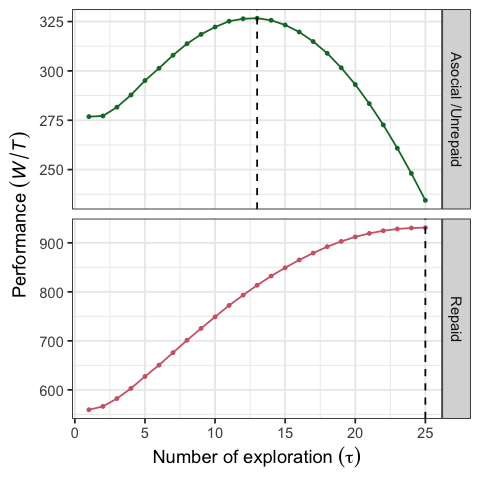

In [21]:
labeli2 <- as_labeller(c("Wpu" = "Asocial /Unrepaid",
                         "Wpr" = "Repaid" ))
taulabel<- expression(italic(tau)*"*")

y_title <- expression("Performance " (italic(W)/italic(T)))
x_title <- expression("Number of exploration "*(italic(tau)))

options(repr.plot.width=4., repr.plot.height=4)
SimS3W %>%  ggplot(aes(x=tau,y=as.numeric(Performance/50)))+
geom_line(aes( color = as.factor(Condition)), alpha = 1)+
geom_point(aes(color = as.factor(Condition)),size = 0.7, alpha = 1)+
facet_grid(Condition~ . , scales = "free", labeller = labeli2) +geom_vline(xintercept = WpuMax, size = 0.5, linetype = 2, alpha=c(1,0)) +
geom_vline(xintercept = WprMax, size = 0.5, linetype = 2, alpha=c(0,1)) +
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none")+
xlab(x_title )+ylab(y_title ) -> SimS3plot
#ggsave("Simuation_main.pdf", dpi = 220, device = "pdf", width = 4, height = 4)
SimS3plot
WpuMax
WprMax



In [22]:
data.frame(rbind(SaveS1S,SaveS2S,SaveS3S))->SaveSimAll
colnames(SaveSimAll)<-c("Performance", "tau", "Condition", "Season")
SaveSimAll$Condition<-factor(SaveSimAll$Condition, level = c("U","R"))

head(SaveSimAll)

,Performance,tau,Condition,Season
,<chr>,<chr>,<fct>,<chr>
1,313.89904,1,U,1
2,317.08072,2,U,1
3,325.7363,3,U,1
4,336.4956,4,U,1
5,348.79302,5,U,1
6,361.23078,6,U,1


In [23]:
SaveSimAll$Condition<-factor(SaveSimAll$Condition, level = c("U","R"))

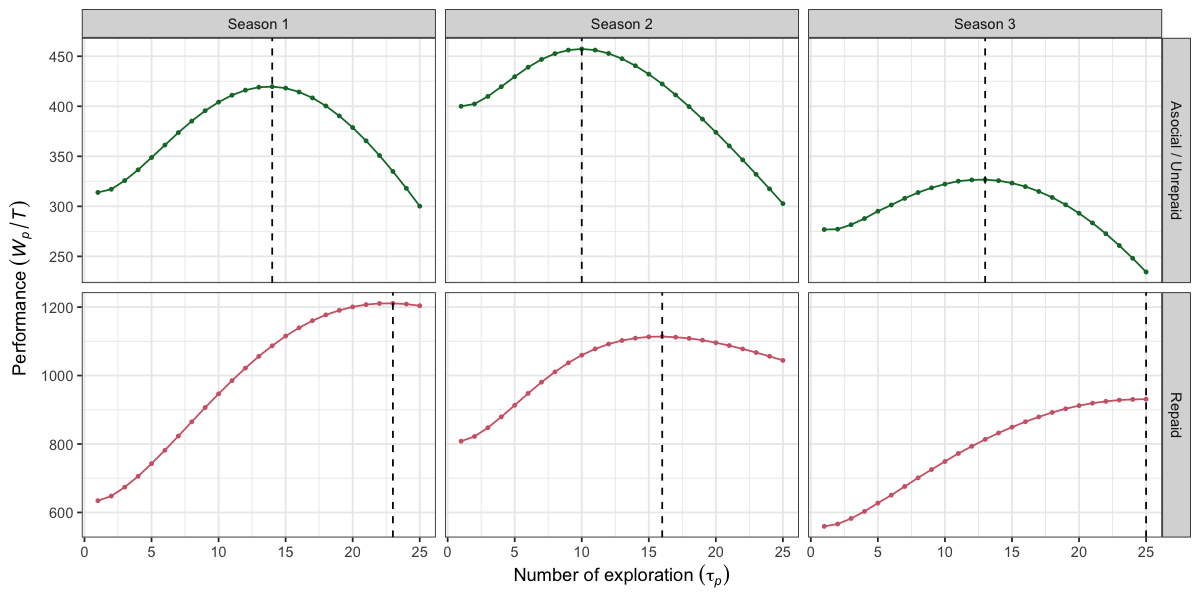

In [24]:
labeli2 <- as_labeller(c("U" = "Asocial / Unrepaid",
                         "R" = "Repaid", 
                        "1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3"))
y_title <- expression("Performance " (italic(W[p])/italic(T)))
x_title <-expression("Number of exploration "*(italic(tau[p])))

options(repr.plot.width=10, repr.plot.height=5)
SaveSimAll %>%  ggplot(aes(x=as.numeric(tau),y=as.numeric(Performance)))+
geom_line(aes( color = as.factor(Condition)),  alpha = 1)+
geom_point(aes(color = as.factor(Condition)),size = 0.7, alpha = 1)+
facet_grid(Condition~Season , labeller = labeli2, scales = "free")+
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none")+
xlab(x_title )+ylab(y_title ) +
geom_vline(xintercept = saveSimOpt_tp[1,1], size = 0.5, linetype = 2, alpha=c(1,0,0,0,0,0)) +
geom_vline(xintercept = saveSimOpt_tp[1,2], size = 0.5, linetype = 2, alpha=c(0,1,0,0,0,0)) +
geom_vline(xintercept = saveSimOpt_tp[1,3], size = 0.5, linetype = 2, alpha=c(0,0,1,0,0,0)) +
geom_vline(xintercept = saveSimOpt_tp[2,1], size = 0.5, linetype = 2, alpha=c(0,0,0,1,0,0)) +
geom_vline(xintercept = saveSimOpt_tp[2,2], size = 0.5, linetype = 2, alpha=c(0,0,0,0,1,0)) +
geom_vline(xintercept = saveSimOpt_tp[2,3], size = 0.5, linetype = 2, alpha=c(0,0,0,0,0,1)) -> SimAllplot


SimAllplot

In [25]:
#options(repr.plot.width=13, repr.plot.height=5)
#grid.arrange(SimS1plot, SimS2plot, SimS3plot, nrow = 1)


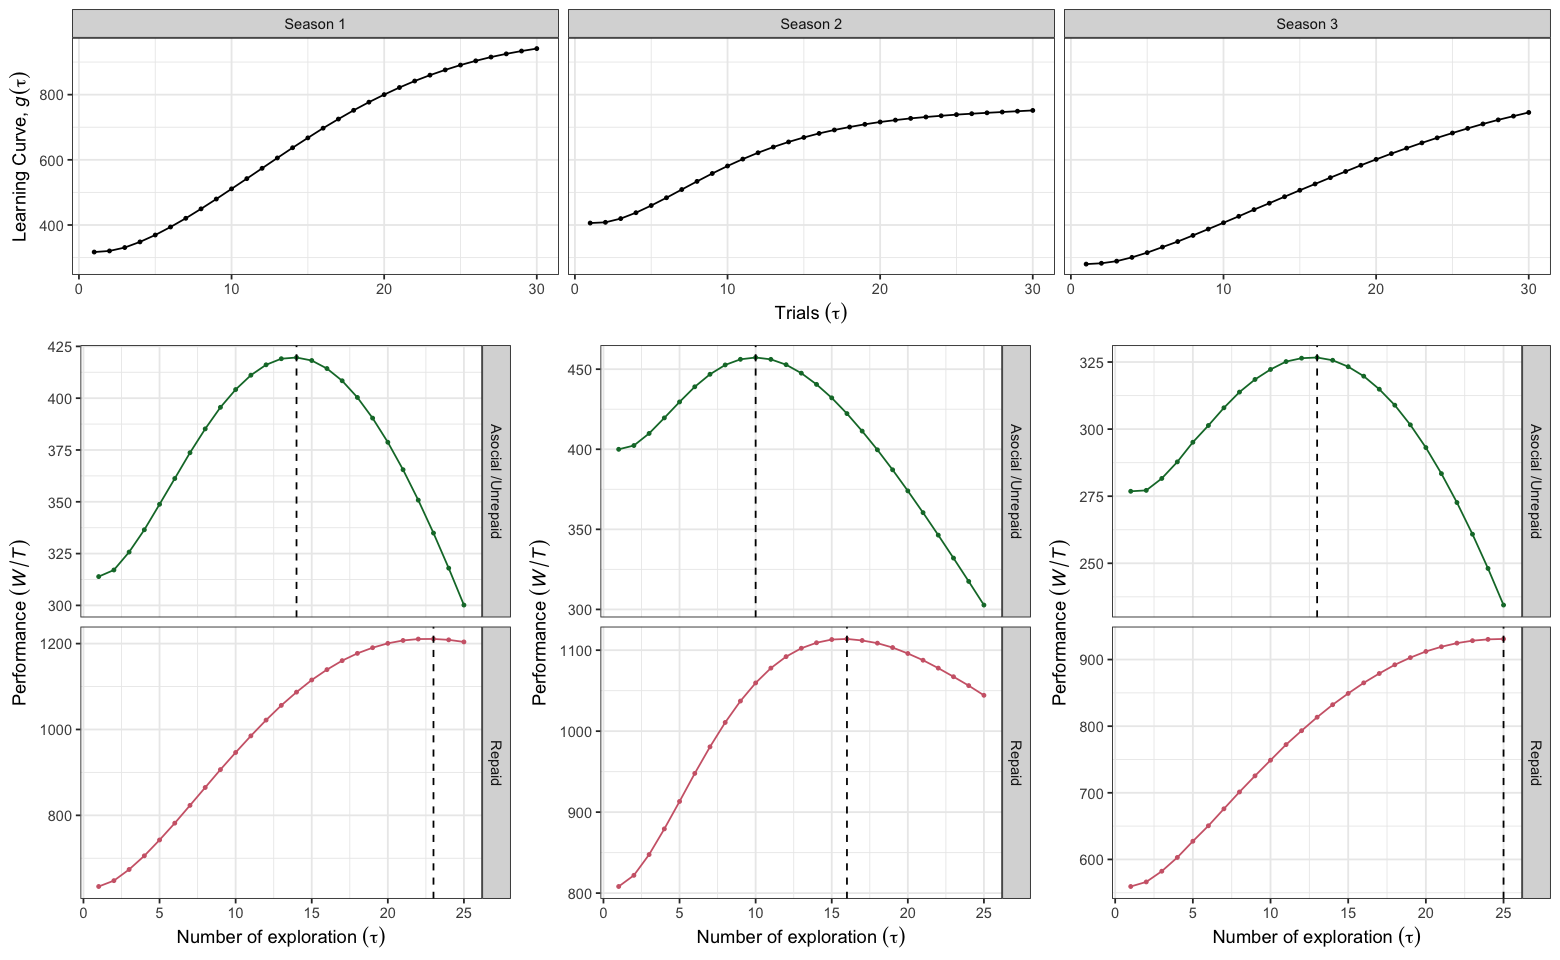

In [26]:
options(repr.plot.width=13, repr.plot.height=8)



layout1 <- rbind(c(1, 1, 1),
                 c(2, 3, 4))
grid.arrange(SimuPlot, SimS1plot, SimS2plot, SimS3plot, layout_matrix =layout1,heights=c(0.7,1.3))

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

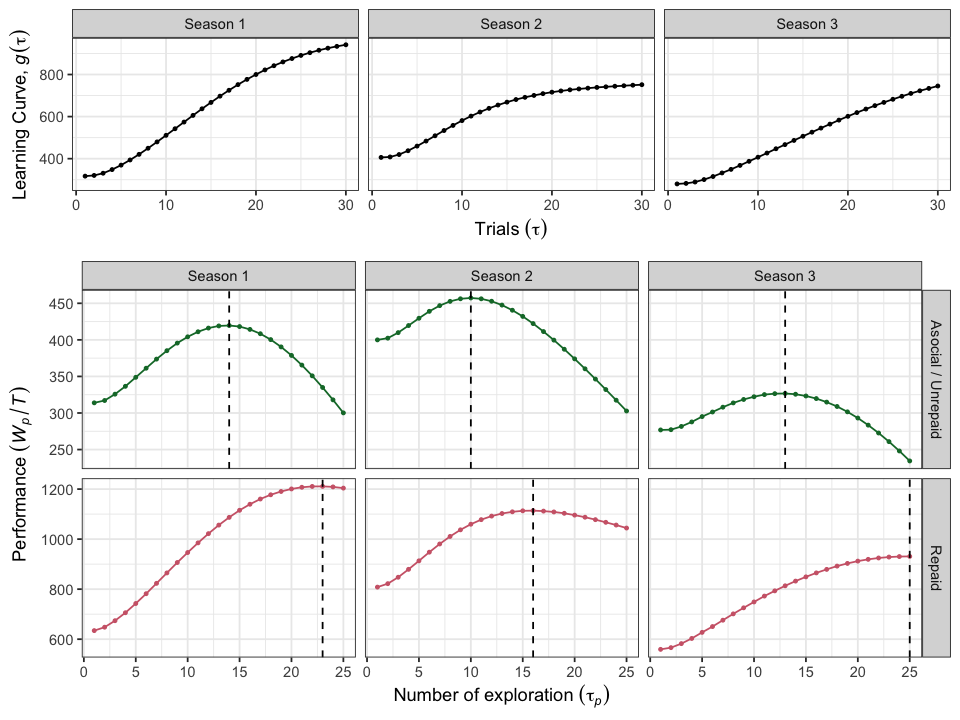

In [27]:
options(repr.plot.width=8, repr.plot.height=6)
grid.arrange(SimuPlot,SimAllplot, ncol = 1,heights=c(0.7,1.3)) -> gsim
gsim


ggsave("Simuation_previous_sim.pdf",gsim, dpi = 220, device = "pdf", width = 8, height = 6)
ggsave("Simuation_previous_sim.eps",gsim, dpi = 220, device = "eps", width = 8, height = 6)

## Experimental Data

### Learning Curve

Data and code at github: https://github.com/YNakawake/projectile_neg/blob/main/analysis/maindata_analysis/exp_data.csv

In [28]:
edf<-read.csv("exp_data.csv")

In [29]:
head(edf)

,ID,ID2,Season,SocInfo,Trial,Length,Width,Thick,Shape,Color,Fitness,erroredFitnness,LT1,LT2,LT3,LT4,Click1,Click2,Click3,Click4
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,B6,1,0,1,52,22,75,2,3,274,267,0,0,0,0,0,0,0,0
2,1,B6,1,0,2,100,100,100,2,3,118,123,0,0,0,0,0,0,0,0
3,1,B6,1,0,3,100,50,70,2,3,334,336,0,0,0,0,0,0,0,0
4,1,B6,1,0,4,95,35,50,2,3,407,408,0,0,0,0,0,0,0,0
5,1,B6,1,0,5,75,25,25,2,3,441,440,0,0,0,0,0,0,0,0
6,1,B6,1,0,6,65,15,15,1,2,307,304,0,0,0,0,0,0,0,0


In [30]:
filter(edf, Season ==1, SocInfo == 0) ->ES1
filter(edf, Season ==2, SocInfo == 0)->ES2
filter(edf, Season ==3, SocInfo == 0) ->ES3


tapply(ES1$Fitness,ES1$Trial,mean) -> ES1M
tapply(ES2$Fitness,ES2$Trial,mean) -> ES2M
tapply(ES3$Fitness,ES2$Trial,mean) -> ES3M

cbind(ES1M, Trial<-1:30, Season<-rep(1,30)) -> ES1Mdf
cbind(ES2M, Trial<-1:30, Season<-rep(2,30)) -> ES2Mdf
cbind(ES3M, Trial<-1:30, Season<-rep(3,30)) -> ES3Mdf

data.frame(rbind(ES1Mdf,ES2Mdf,ES3Mdf))->EMdf
colnames(EMdf)<-c("Fitness","Trial", "Season") 



In [31]:
colnames(EMdf)<-c("Fitness","Trial", "Season") 

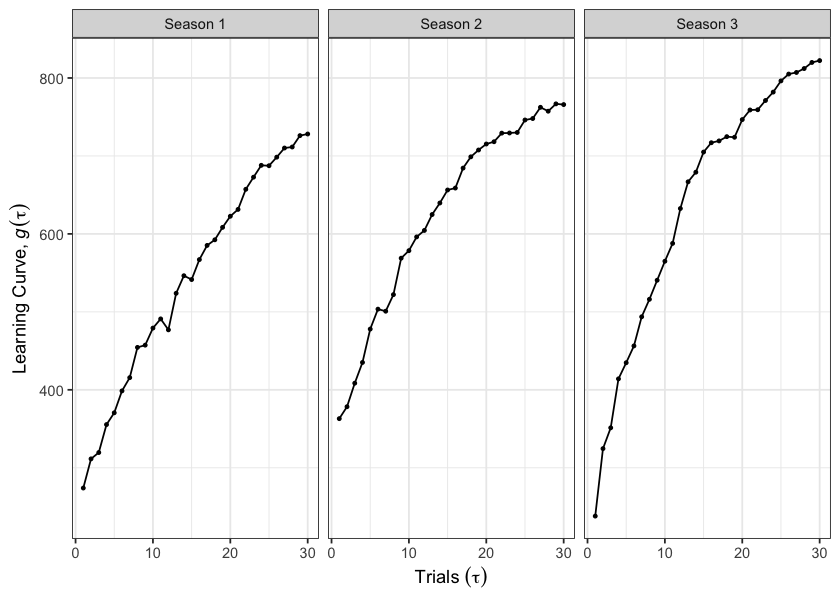

In [32]:
labeli <- as_labeller(c("1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3",
                          "Directional"="Memory Only",
                          "Move"="Fixed Stride",
                          "Mirror"="Variable Stride"))

options(repr.plot.width=7, repr.plot.height=5)

y_title <- expression("Learning Curve, "*italic(g(tau)))
x_title <- expression("Trials "*(italic(tau)))

ggplot(EMdf, aes(x=Trial, y=Fitness)) +  
geom_point(size = 0.7)+geom_line()+
scale_color_manual(values = "black")+
scale_fill_manual(values = "black")+
theme_bw()+scale_shape_manual(values = c(21))+theme(legend.position = "none")+ylab(y_title ) +xlab(x_title )+
facet_grid(.~ Season  ,labeller = labeli) -> SimuPlotExp
 SimuPlotExp

In [33]:
saveExpOpt_tp<-data.frame(matrix(0,2,3))
rownames(saveExpOpt_tp)<-c("Wpu","Wpr")
colnames(saveExpOpt_tp)<-c("Season1","Season2", "Season3")

saveExpOpt_tp

,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,0,0,0
Wpr,0,0,0


### Season1

In [34]:
T = 50
LarningCurve<-  ES1M
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]


Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


ExpS1W<-melt(cbind(Wpu, Wpr)) 
colnames(ExpS1W)<-c("tau", "Condition","Performance")
ExpS1W$Condition <- factor(ExpS1W$Condition, levels = c("Wpu","Wpr"))

head(ExpS1W)



saveExpOpt_tp[1,1] <-WpuMax
saveExpOpt_tp[2,1] <-WprMax
saveExpOpt_tp



    a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(1, 25))
    b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(1, 25))
rbind(a,b) -> SaveS1Exp

[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,15222.40
2,2,Wpu,15284.73
3,3,Wpu,16542.57
4,4,Wpu,16822.42
5,5,Wpu,17574.90
6,6,Wpu,17822.30


,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,7,0,0
Wpr,23,0,0


### Season2

In [35]:
T = 50
LarningCurve<-  ES2M
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]


Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


ExpS2W<-melt(cbind(Wpu, Wpr)) 
colnames(ExpS2W)<-c("tau", "Condition","Performance")
ExpS2W$Condition <- factor(ExpS1W$Condition, levels = c("Wpu","Wpr"))

head(ExpS1W)



saveExpOpt_tp[1,2] <-WpuMax
saveExpOpt_tp[2,2] <-WprMax
saveExpOpt_tp

a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(2, 25))
b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(2, 25))
rbind(a,b) -> SaveS2Exp


[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,15222.40
2,2,Wpu,15284.73
3,3,Wpu,16542.57
4,4,Wpu,16822.42
5,5,Wpu,17574.90
6,6,Wpu,17822.30


,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,7,8,0
Wpr,23,17,0


## Season3

In [36]:
T = 50
LarningCurve<-  ES3M
g_0 <- LarningCurve[1]
g_tau<-LarningCurve[2:length(LarningCurve)]


Wpu<-numeric(25)
Wpr<-numeric(25)

for (tp in 1:25){
    {
        Wpu[tp] <- g_0 + sum(g_tau[1:tp])+ (50- 2*tp -1)*g_tau[tp]
        Wpr[tp] <- g_0 + sum(g_tau[1:tp])+ (2*50- 2*tp -1)*g_tau[tp]
        
    }
}


"Optimal tau_p"
WpuMax<-which.max(Wpu)
WprMax<-which.max(Wpr)

#WpuMax
#WprMax


ExpS3W<-melt(cbind(Wpu, Wpr)) 
colnames(ExpS3W)<-c("tau", "Condition","Performance")
ExpS3W$Condition <- factor(ExpS3W$Condition, levels = c("Wpu","Wpr"))

head(ExpS3W)



saveExpOpt_tp[1,3] <-WpuMax
saveExpOpt_tp[2,3] <-WprMax
saveExpOpt_tp


a<-cbind(Wpu/50, 1:25, rep("U", 25), rep(3, 25))
b<-cbind(Wpr/50, 1:25, rep("R", 25), rep(3, 25))
rbind(a,b) -> SaveS3Exp

[1] "Optimal tau_p"

,tau,Condition,Performance
,<int>,<fct>,<dbl>
1,1,Wpu,15816.40
2,2,Wpu,16721.20
3,3,Wpu,19132.03
4,4,Wpu,19587.38
5,5,Wpu,20014.62
6,6,Wpu,20978.58


,Season1,Season2,Season3
,<dbl>,<dbl>,<dbl>
Wpu,7,8,12
Wpr,23,17,15


### All Seasons

In [37]:
data.frame(rbind(SaveS1Exp,SaveS2Exp,SaveS3Exp))->SaveExpAll
colnames(SaveExpAll)<-c("Performance", "tau", "Condition", "Season")
SaveExpAll$Condition<-factor(SaveSimAll$Condition, level = c("U","R"))

head(SaveSimAll)

,Performance,tau,Condition,Season
,<chr>,<chr>,<fct>,<chr>
1,313.89904,1,U,1
2,317.08072,2,U,1
3,325.7363,3,U,1
4,336.4956,4,U,1
5,348.79302,5,U,1
6,361.23078,6,U,1


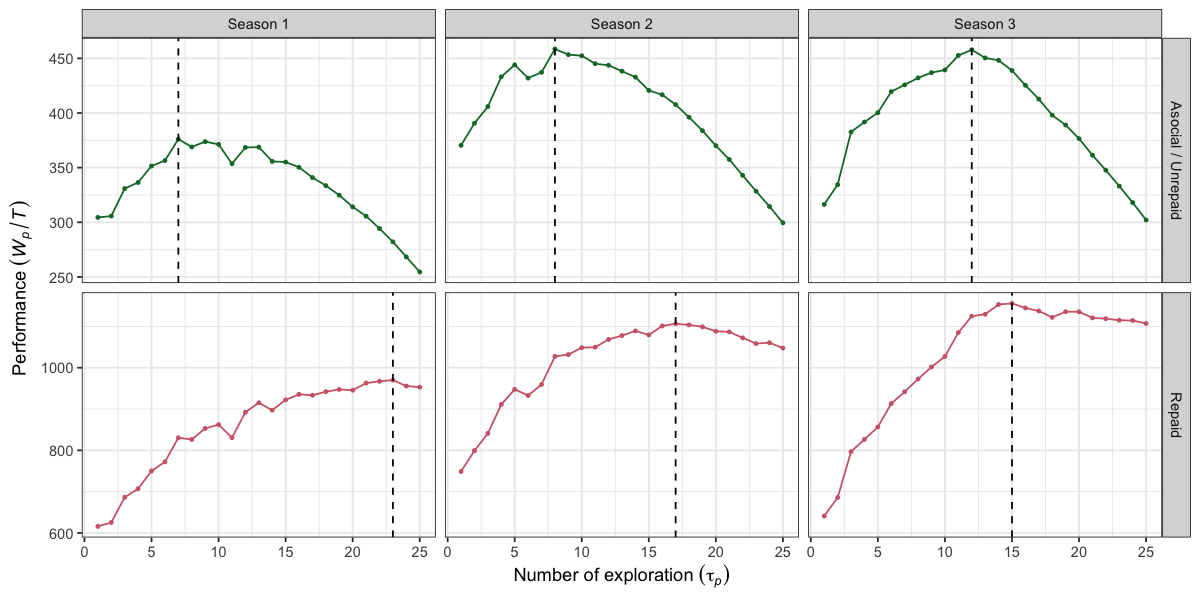

In [38]:
labeli2 <- as_labeller(c("U" = "Asocial / Unrepaid",
                         "R" = "Repaid", 
                        "1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3"))
y_title <- expression("Performance " (italic(W[p])/italic(T)))
x_title <-expression("Number of exploration "*(italic(tau[p])))

options(repr.plot.width=10, repr.plot.height=5)
SaveExpAll %>%  ggplot(aes(x=as.numeric(tau),y=as.numeric(Performance)))+
geom_line(aes( color = as.factor(Condition)),  alpha = 1)+
geom_point(aes(color = as.factor(Condition)),size = 0.7, alpha = 1)+
facet_grid(Condition~Season , labeller = labeli2, scales = "free")+
scale_fill_manual(values = CPalet)+
scale_color_manual(values = CPalet)+theme_bw()+theme(legend.position = "none")+
xlab(x_title )+ylab(y_title ) +
geom_vline(xintercept = saveExpOpt_tp[1,1], size = 0.5, linetype = 2, alpha=c(1,0,0,0,0,0)) +
geom_vline(xintercept = saveExpOpt_tp[1,2], size = 0.5, linetype = 2, alpha=c(0,1,0,0,0,0)) +
geom_vline(xintercept = saveExpOpt_tp[1,3], size = 0.5, linetype = 2, alpha=c(0,0,1,0,0,0)) +
geom_vline(xintercept = saveExpOpt_tp[2,1], size = 0.5, linetype = 2, alpha=c(0,0,0,1,0,0)) +
geom_vline(xintercept = saveExpOpt_tp[2,2], size = 0.5, linetype = 2, alpha=c(0,0,0,0,1,0)) +
geom_vline(xintercept = saveExpOpt_tp[2,3], size = 0.5, linetype = 2, alpha=c(0,0,0,0,0,1)) -> SimAllplotExp


SimAllplotExp

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

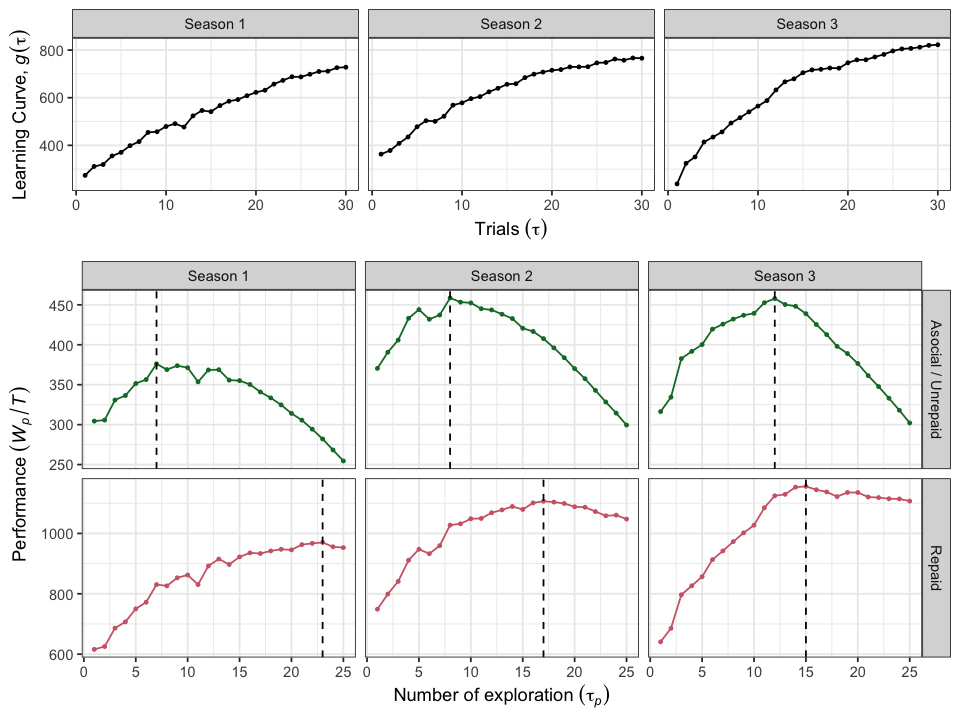

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
grid.arrange(SimuPlotExp,SimAllplotExp, ncol = 1,heights=c(0.7,1.3))  -> gexp

 gexp

ggsave("Simuation_previous_exp.pdf",gexp, dpi = 220, device = "pdf", width = 8, height = 6)
ggsave("Simuation_previous_exp.eps",gexp, dpi = 220, device = "eps", width = 8, height = 6)